# Practical 6: MRIO seminal works

**Objectives:**
- Learn how to replicate the methods and results from a few studies. 
- Understand and explain main results from EEIOA studies using MRIO seminal works

In [1]:
# Import modules
import pandas as pd
import numpy as np

## Data pre-processing

Based on [Exiobase's IOT_2019_pxp.zip](https://zenodo.org/record/5589597) dataset

### Load data

In [2]:
dir_path = "../data/exiobase/_pxp/IOT_2019_pxp/"

The folder has the following structure:  

```
├── impacts  
│   ├── F_Y.txt  
│   ├── F.txt  
│   └── ...
├── satellite  
│   ├── F_Y.txt  
│   ├── F.txt  
│   └── ...
├── A.txt
├── finaldemands.txt  
├── industries.txt  
├── products.txt  
├── unit.txt  
├── x.txt  
├── Y.txt  
└── Z.txt  
```

In [3]:
# Import A, Y, F and F_Y (from SATELLITE)
# ! 'A' is a large datasets, mind load time
A = pd.read_csv(f'{dir_path}A.txt', delimiter="\t", header=[0,1], index_col=[0,1])
Y = pd.read_csv(f'{dir_path}Y.txt', delimiter="\t", header=[0,1], index_col=[0,1])
# ! we use the satellite folder this time because we will look at uncharacterized stressors (CO2 emission vs GWP100)
F = pd.read_csv(f'{dir_path}satellite/F.txt', delimiter="\t", header=[0,1], index_col=[0])
F_y = pd.read_csv(f'{dir_path}satellite/F_Y.txt', delimiter="\t", header=[0,1], index_col=[0])
F_unit = pd.read_csv(f'{dir_path}satellite/unit.txt', delimiter="\t", header=[0,1], index_col=[0])

### Get labels

In [4]:
# get multiindex
region_and_sector_labels = A.index

# get each level using  'get_level_values()'
region_labels = A.index.get_level_values(level=0).unique()
sector_labels = A.index.get_level_values(level=1).unique()

# visualize
region_labels

Index(['AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 'FR', 'GR',
       'HR', 'HU', 'IE', 'IT', 'LT', 'LU', 'LV', 'MT', 'NL', 'PL', 'PT', 'RO',
       'SE', 'SI', 'SK', 'GB', 'US', 'JP', 'CN', 'CA', 'KR', 'BR', 'IN', 'MX',
       'RU', 'AU', 'CH', 'TR', 'TW', 'NO', 'ID', 'ZA', 'WA', 'WL', 'WE', 'WF',
       'WM'],
      dtype='object', name='region')

## Input-Output calculations
### Leontief inverse

In [5]:
# Create an identity matrix the same order
Id = np.identity(len(region_and_sector_labels))

# Compute leontief inverse matrix in the Demand-pull model
L_values = np.linalg.inv((Id - A))
L = pd.DataFrame(L_values, index=region_and_sector_labels, columns=region_and_sector_labels)


### Product output X

In [6]:
# Compute using L
X = L @ Y.sum(axis=1)

## Exercise 1
[Hertwich and Peters (2009)](https://doi.org/10.1021/es803496a) developed an analysis of the carbon footprint of multiple countries in 2001. Their results show the carbon footprint of different final demand categories per product.

![global CP2 footprint](../img/global_CO2_footprint.png) 
Figure 1. Global CO2 footprint for different consumption categories and users retrieved from Hertwich and Peters (2009)

In this exercise you will reproduce these results using EXIOBASE and compare any changes between 2001 and 2011

### Environmental intensity

In [7]:
# compute extension intensity
f = F / X.transpose()
f = f.replace([np.inf, -np.inf, np.nan], 0)  # ! don't forget to replace
f.columns = region_and_sector_labels

# Visualise
f

region                                                     AT            \
sector                                             Paddy rice     Wheat   
stressor                                                                  
Taxes less subsidies on products purchased: Total         0.0  0.015956   
Other net taxes on production                             0.0 -0.045710   
Compensation of employees; wages, salaries, & e...        0.0  0.002768   
Compensation of employees; wages, salaries, & e...        0.0  0.037726   
Compensation of employees; wages, salaries, & e...        0.0  0.006072   
...                                                       ...       ...   
Energy Carrier Net TMAR                                   0.0  0.000000   
Energy Carrier Net TOTH                                   0.0  0.000000   
Energy Carrier Net TRAI                                   0.0  0.000000   
Energy Carrier Net TROA                                   0.0  4.207262   
Energy Carrier Net LOSS                                   0.0  0.000000   

region                                                                \
sector                                             Cereal grains nec   
stressor                                                               
Taxes less subsidies on products purchased: Total           0.013130   
Other net taxes on production                              -0.043477   
Compensation of employees; wages, salaries, & e...          0.002423   
Compensation of employees; wages, salaries, & e...          0.033030   
Compensation of employees; wages, salaries, & e...          0.005317   
...                                                              ...   
Energy Carrier Net TMAR                                     0.000000   
Energy Carrier Net TOTH                                     0.000000   
Energy Carrier Net TRAI                                     0.000000   
Energy Carrier Net TROA                                     0.246545   
Energy Carrier Net LOSS                                     0.000000   

region                                                                      \
sector                                             Vegetables, fruit, nuts   
stressor                                                                     
Taxes less subsidies on products purchased: Total                 0.006244   
Other net taxes on production                                    -0.030091   
Compensation of employees; wages, salaries, & e...                0.001997   
Compensation of employees; wages, salaries, & e...                0.027227   
Compensation of employees; wages, salaries, & e...                0.004383   
...                                                                    ...   
Energy Carrier Net TMAR                                           0.000000   
Energy Carrier Net TOTH                                           0.000000   
Energy Carrier Net TRAI                                           0.000000   
Energy Carrier Net TROA                                           0.385840   
Energy Carrier Net LOSS                                           0.000000   

region                                                        \
sector                                             Oil seeds   
stressor                                                       
Taxes less subsidies on products purchased: Total   0.007371   
Other net taxes on production                      -0.045162   
Compensation of employees; wages, salaries, & e...  0.001336   
Compensation of employees; wages, salaries, & e...  0.018216   
Compensation of employees; wages, salaries, & e...  0.002932   
...                                                      ...   
Energy Carrier Net TMAR                             0.000000   
Energy Carrier Net TOTH                             0.000000   
Energy Carrier Net TRAI                             0.000000   
Energy Carrier Net TROA                             0.208691   
Energy Carrier 

### Contribution of Final Demand to the CO2 footprint

Calculate the CO2 footprint of the global final demand matrix `Y`. But this time, we will only focus on the following categories and keep them disaggregated:
- `households` (y_hh)
- `government expenditures` (y_gov)
- `gross capital formation` (y_gfcf)

In [8]:
# select extension indicator
CO2 = 'CO2 - combustion - air'

# select final demand sectors
HH = 'Final consumption expenditure by households' 
GOV = 'Final consumption expenditure by government'	
GFCF = 'Gross fixed capital formation'
Y_categories = [HH, GOV, GFCF]

f_co2 = f.loc[CO2]

# Method 1
# create an empty dataframe to store values
F_co2_categories_ = pd.DataFrame(index=region_and_sector_labels)
# compute global final demand and CO2 footprint associated
for category in Y_categories:
    Y_co2_1category = Y.loc[:, pd.IndexSlice[:, category]].sum(axis=1)  # sum all countries for each single category
    F_co2_1category = (f_co2 @ L) * Y_co2_1category  # (f @ L) * Y = f @ L @ np.diag(Y)
    F_co2_categories_[category] = F_co2_1category

# Display the result
F_co2_categories_

Final consumption expenditure by households  \
region sector                                                                                           
AT     Paddy rice                                                                        0.000000e+00   
       Wheat                                                                             1.087812e+08   
       Cereal grains nec                                                                 7.717334e+07   
       Vegetables, fruit, nuts                                                           1.802045e+08   
       Oil seeds                                                                         1.079556e+07   
...                                                                                               ...   
WM     Membership organisation services n.e.c. (91)                                      1.690726e+09   
       Recreational, cultural and sporting services (92)                                 9.760243e+09   
       Other services (93)                                                               1.186429e+10   
       Private households with employed persons (95)                                     6.531775e+08   
       Extra-territorial organizations and bodies                                        0.000000e+00   

                                                          Final consumption expenditure by government  \
region sector                                                                                           
AT     Paddy rice                                                                        0.000000e+00   
       Wheat                                                                             2.296212e+05   
       Cereal grains nec                                                                 8.599852e+04   
       Vegetables, fruit, nuts                                                           4.330476e+04   
       Oil seeds                                                                         2.230738e+03   
...                                                                                               ...   
WM     Membership organisation services n.e.c. (91)                                      6.155555e+08   
       Recreational, cultural and sporting services (92)                                 2.710620e+09   
       Other services (93)                                                               1.042448e+08   
       Private households with employed persons (95)                                     4.840434e+07   
       Extra-territorial organizations and bodies                                        0.000000e+00   

                                                          Gross fixed capital formation  
region sector                                                                            
AT     Paddy rice                                                          0.000000e+00  
       Wheat                                                               0.000000e+00  
       Cereal grains nec                                                   3.720931e+01  
       Vegetables, fruit, nuts                                             1.507966e+05  
       Oil seeds                                                           0.000000e+00  
...                                                                                 ...  
WM     Membership organisation services n.e.c. (91)                        0.000000e+00  
       Recreational, cultural and sporting services (92)                   9.663414e+08  
       Other services (93)                                                 6.225697e+08  
       Private households with employed persons (95)                       7.850999e+06  
       Extra-territorial organizations and bodies                          0.000000e+00  

[9800 rows x 3 columns]

In [9]:
# Alternative methods (see Practical 5)
Y_co2_categories = Y.loc[:, pd.IndexSlice[:, Y_categories]]
Y_co2_categories = Y_co2_categories.groupby('category', axis=1).sum()  # sum all countries for each single category
F_co2_categories = (f_co2 @ L) * Y_co2_categories.T  # ! right side of * needs to be transposed if it contains multiple columns
F_co2_categories = F_co2_categories.T
F_co2_categories = F_co2_categories.reindex(index=region_and_sector_labels, columns=Y_categories)

# Sanity check
if not np.allclose(F_co2_categories, F_co2_categories_):
    raise ValueError('Discrepancy between the 2 methods')

### Aggregate CO2 footprint per sector

In [10]:
# aggregate results per product category
# ! groupby will reshuffle index order --> use reindex()
df_co2 = F_co2_categories.groupby('sector', axis=0).sum()
df_co2 = df_co2.reindex(index = sector_labels)  # always reindex after groupby to avoid confusion
df_co2

category,Final consumption expenditure by households,Final consumption expenditure by government,Gross fixed capital formation
sector,,,
Paddy rice,1.163226e+11,2.764598e+09,2.569134e+05
Wheat,8.774667e+10,4.301932e+09,1.542536e+08
Cereal grains nec,4.123314e+10,5.426277e+08,4.826224e+07
"Vegetables, fruit, nuts",1.433983e+11,2.258876e+09,1.671479e+09
Oil seeds,5.563191e+09,2.524394e+08,4.974647e+05
...,...,...,...
Membership organisation services n.e.c. (91),4.020530e+10,6.227451e+09,0.000000e+00
"Recreational, cultural and sporting services (92)",1.454217e+11,4.534025e+10,1.241992e+10
Other services (93),2.196536e+11,1.094400e+09,2.627978e+09


### Cluster relevant sectors

In [11]:
# cluster relevant sectors together
clusters = {
    'agriculture & mining' : sector_labels[0:41],
    'manufacturing': sector_labels[41:149],
    'construction': sector_labels[149:151],
    'service': sector_labels[151:200],
}

# create empty dataframe
Footprint = pd.DataFrame(np.nan, index=clusters.keys(), columns=df_co2.columns)
# and fill it
for cluster, labels in clusters.items():
    Footprint.loc[cluster] = df_co2.loc[labels].sum(axis=0)

# Display results
Footprint

category,Final consumption expenditure by households,Final consumption expenditure by government,Gross fixed capital formation
agriculture & mining,6.113032e+11,2.945378e+10,2.595380e+11
manufacturing,8.074339e+12,4.021086e+11,3.238262e+12
construction,2.590925e+10,3.384018e+09,5.666713e+12
service,4.438305e+12,2.341873e+12,5.078619e+11


<Axes: title={'center': "'CO2 - combustion - air' per final demand category"}, ylabel='[kg]'>

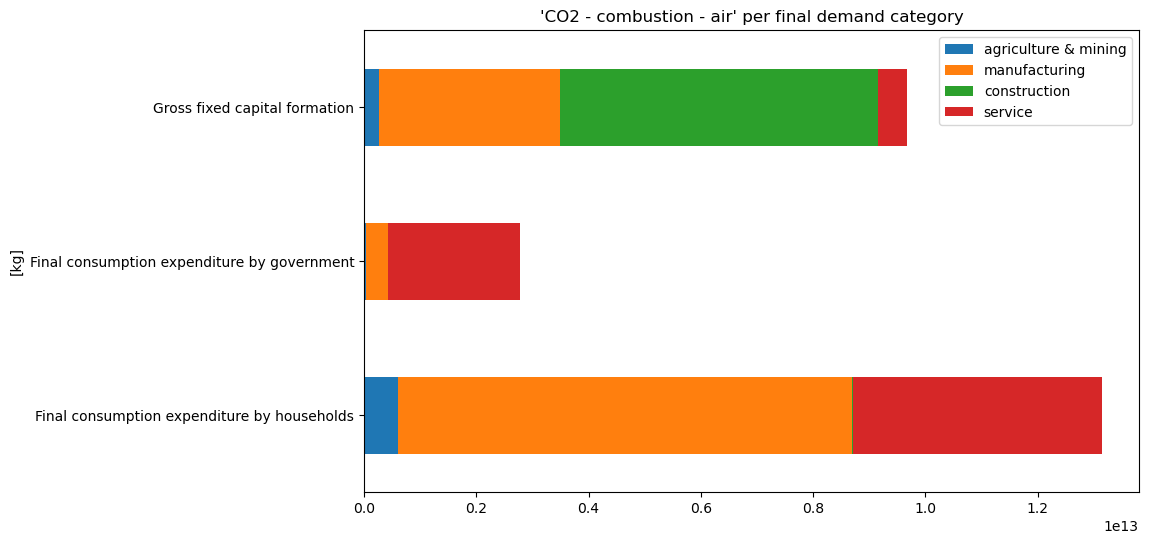

In [12]:
# Plot results
Footprint.T.plot(  # transpose to show per final demand sector
    figsize = (10,6),
    kind = 'barh',
    stacked=True,
    ylabel = F_unit.loc[CO2].values, #
    title = f"'{CO2}' per final demand category",
)

## Going further

### Use vectorization to include all CO2 indicators

See practical 5 for more information

In [13]:
Y_categories = [HH, GOV, GFCF]

# Retrieve all CO2 indicators
MASK = f.index.str.contains("CO2")
CO2 = f.loc[MASK].index
CO2

Index(['CO2 - combustion - air',
       'CO2 - non combustion - Cement production - air',
       'CO2 - non combustion - Lime production - air',
       'CO2 - agriculture - peat decay - air', 'CO2 - waste - biogenic - air',
       'CO2 - waste - fossil - air'],
      dtype='object', name='stressor')

#### Case 1: all CO2 indicators for a single country

In [14]:
# set the country we want to look at
country = 'NL'

In [15]:
# Method 1
columns = pd.MultiIndex.from_product([CO2, Y_categories], names=['stressor', 'category'])
F_co2_categories_1country = pd.DataFrame(np.nan, index=region_and_sector_labels, columns=columns)

# Alternative methods (see Practical 5)
for indicator in CO2:
    f_ = f.loc[indicator]  # single indicator
    Y_co2_categories = Y.loc[:, pd.IndexSlice[country, Y_categories]]  # single country but multiple categories
    F_co2_ = (f_ @ L) * Y_co2_categories.T  # ! right side of * needs to be transposed if it contains multiple columns
    F_co2_ = F_co2_.T
    F_co2_ = F_co2_.reindex(index=region_and_sector_labels)
    F_co2_categories_1country[indicator] = F_co2_.values

# Display results
F_co2_categories_1country

stressor                                                                      CO2 - combustion - air  \
category                                                 Final consumption expenditure by households   
region sector                                                                                          
AT     Paddy rice                                                                           0.000000   
       Wheat                                                                           621913.148543   
       Cereal grains nec                                                               264032.621909   
       Vegetables, fruit, nuts                                                         523971.887943   
       Oil seeds                                                                            0.001351   
...                                                                                              ...   
WM     Membership organisation services n.e.c. (91)                                       475.725047   
       Recreational, cultural and sporting services (92)                                    0.000000   
       Other services (93)                                                             653044.089209   
       Private households with employed persons (95)                                        0.000000   
       Extra-territorial organizations and bodies                                           0.000000   

stressor                                                                                              \
category                                                 Final consumption expenditure by government   
region sector                                                                                          
AT     Paddy rice                                                                           0.000000   
       Wheat                                                                                0.000000   
       Cereal grains nec                                                                    0.000000   
       Vegetables, fruit, nuts                                                              0.000000   
       Oil seeds                                                                            0.000000   
...                                                                                              ...   
WM     Membership organisation services n.e.c. (91)                                       393.072646   
       Recreational, cultural and sporting services (92)                                    0.000000   
       Other services (93)                                                                  0.000000   
       Private households with employed persons (95)                                        0.000000   
       Extra-territorial organizations and bodies                                           0.000000   

stressor                                                                                \
category                                                 Gross fixed capital formation   
region sector                                                                            
AT     Paddy rice                                                                  0.0   
       Wheat                                                                       0.0   
       Cereal grains nec                                                           0.0   
       Vegetables, fruit, nuts                                                     0.0   
       Oil seeds                                                                   0.0   
...                                                                                ...   
WM     Membership organisation services n.e.c. (91)                                0.0   
       Recreational, cultural and sporting services (92)                           0.0   
       Other services (93)                                                         0.0   
      

In [16]:
# Method 2
columns = pd.MultiIndex.from_product([Y_categories, CO2], names=['category', 'stressor'])  # mind the order (smallest first)
F_co2_categories_1country = pd.DataFrame(np.nan, index=region_and_sector_labels, columns=columns)

f_co2 = f.loc[CO2]  # multiple indicators

# Alternative methods (see Practical 5)
for category in Y_categories:
    Y_co2_category = Y.loc[:, pd.IndexSlice[country, category]]  # single country and single category
    F_co2_ = (f_co2 @ L) * Y_co2_category
    F_co2_ = F_co2_.T
    F_co2_ = F_co2_.reindex(index=region_and_sector_labels, columns=CO2)
    F_co2_categories_1country[category] = F_co2_.values

# Display results
# F_co2_categories_1country

In [17]:
# Aggregate results accross final demand categories and sectors
df_co2 = F_co2_categories_1country.groupby('category', axis=1).sum()
df_co2 = df_co2.groupby('sector', axis=0).sum()
df_co2 = df_co2.reindex(index=sector_labels, columns=Y_categories)

# create empty dataframe
Footprint = pd.DataFrame(np.nan, index=clusters.keys(), columns=df_co2.columns)
# and fill it
for cluster, labels in clusters.items():
    Footprint.loc[cluster] = df_co2.loc[labels].sum(axis=0)

# Display results
Footprint

category,Final consumption expenditure by households,Final consumption expenditure by government,Gross fixed capital formation
agriculture & mining,3.361076e+09,0.000000e+00,3.273198e+08
manufacturing,4.136012e+10,6.288277e+09,1.292368e+10
construction,2.459527e+08,1.858293e+08,2.148092e+10
service,2.774607e+10,1.640505e+10,5.884151e+09


<Axes: title={'center': 'NL CO2 emissions per final demand category (all indicators)'}, ylabel='category'>

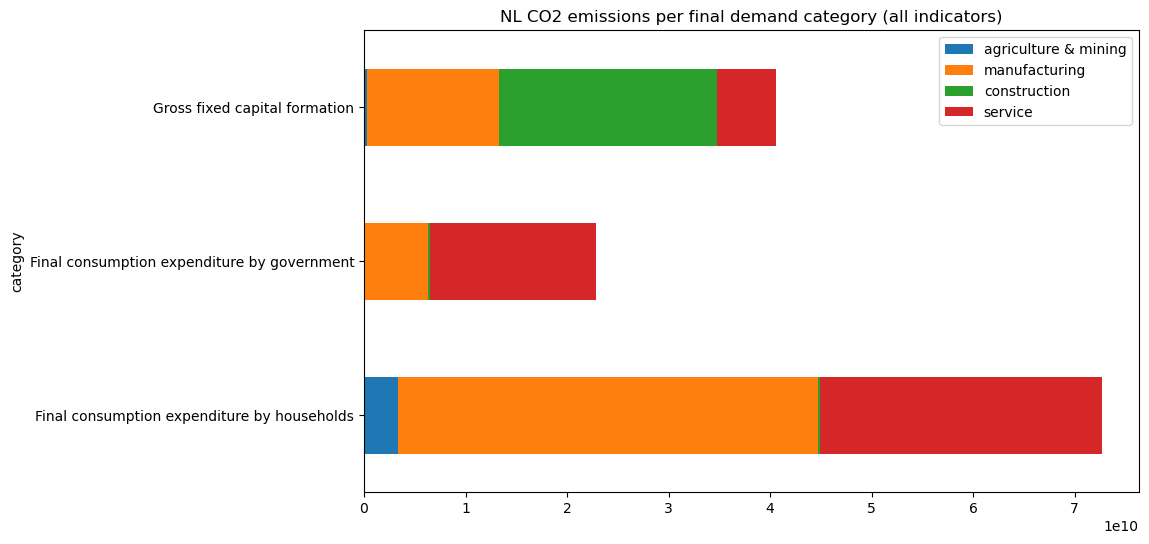

In [18]:
# Plot results
Footprint.T.plot(  # transpose to show per final demand sector
    figsize = (10,6),
    kind = 'barh',
    stacked=True,
    title = f"{country} CO2 emissions per final demand category (all indicators)",
)

#### Case 2: all CO2 indicators for whole world

In [19]:
columns = pd.MultiIndex.from_product([CO2, Y_categories], names=['stressor', 'category'])
F_co2_categories = pd.DataFrame(np.nan, index=region_and_sector_labels, columns=columns)

# Alternative methods (see Practical 5)
for indicator in CO2:
    f_ = f.loc[indicator]  # single indicator
    Y_co2_categories = Y.loc[:, pd.IndexSlice[:, Y_categories]]  # multiple categories
    Y_co2_categories = Y_co2_categories.groupby('category', axis=1).sum()  # sum all countries for each single category
    F_co2_ = (f_ @ L) * Y_co2_categories.T  # ! right side of * needs to be transposed if it contains multiple columns
    F_co2_ = F_co2_.T
    F_co2_ = F_co2_.reindex(index=region_and_sector_labels, columns=Y_categories)
    F_co2_categories[indicator] = F_co2_.values

# Display results
F_co2_categories

stressor                                                                      CO2 - combustion - air  \
category                                                 Final consumption expenditure by households   
region sector                                                                                          
AT     Paddy rice                                                                       0.000000e+00   
       Wheat                                                                            1.087812e+08   
       Cereal grains nec                                                                7.717334e+07   
       Vegetables, fruit, nuts                                                          1.802045e+08   
       Oil seeds                                                                        1.079556e+07   
...                                                                                              ...   
WM     Membership organisation services n.e.c. (91)                                     1.690726e+09   
       Recreational, cultural and sporting services (92)                                9.760243e+09   
       Other services (93)                                                              1.186429e+10   
       Private households with employed persons (95)                                    6.531775e+08   
       Extra-territorial organizations and bodies                                       0.000000e+00   

stressor                                                                                              \
category                                                 Final consumption expenditure by government   
region sector                                                                                          
AT     Paddy rice                                                                       0.000000e+00   
       Wheat                                                                            2.296212e+05   
       Cereal grains nec                                                                8.599852e+04   
       Vegetables, fruit, nuts                                                          4.330476e+04   
       Oil seeds                                                                        2.230738e+03   
...                                                                                              ...   
WM     Membership organisation services n.e.c. (91)                                     6.155555e+08   
       Recreational, cultural and sporting services (92)                                2.710620e+09   
       Other services (93)                                                              1.042448e+08   
       Private households with employed persons (95)                                    4.840434e+07   
       Extra-territorial organizations and bodies                                       0.000000e+00   

stressor                                                                                \
category                                                 Gross fixed capital formation   
region sector                                                                            
AT     Paddy rice                                                         0.000000e+00   
       Wheat                                                              0.000000e+00   
       Cereal grains nec                                                  3.720931e+01   
       Vegetables, fruit, nuts                                            1.507966e+05   
       Oil seeds                                                          0.000000e+00   
...                                                                                ...   
WM     Membership organisation services n.e.c. (91)                       0.000000e+00   
       Recreational, cultural and sporting services (92)                  9.663414e+08   
       Other services (93)                                                6.225697e+08   
      

In [20]:
columns = pd.MultiIndex.from_product([Y_categories, CO2], names=['category', 'stressor'])  # mind the order (smallest first)
F_co2_categories = pd.DataFrame(np.nan, index=region_and_sector_labels, columns=columns)

f_co2 = f.loc[CO2]  # multiple indicators

# Alternative methods (see Practical 5)
for category in Y_categories:
    Y_co2_categories = Y.loc[:, pd.IndexSlice[:, category]]
    Y_co2_categories = Y_co2_categories.groupby('category', axis=1).sum()  # sum all countries for each single category
    Y_co2_categories = Y_co2_categories[category]  # ! single category (but we need a Series instead of DataFrame)
    F_co2_ = (f_co2 @ L) * Y_co2_categories.T  # ! right side of * needs to be transposed if it contains multiple columns
    F_co2_ = F_co2_.T
    F_co2_ = F_co2_.reindex(index=region_and_sector_labels, columns=CO2)
    F_co2_categories[category] = F_co2_.values

# Display results
# F_co2_categories

In [21]:
# Aggregate results accross final demand categories and sectors
df_co2 = F_co2_categories_1country.groupby('category', axis=1).sum()
df_co2 = df_co2.groupby('sector', axis=0).sum()
df_co2 = df_co2.reindex(index=sector_labels, columns=Y_categories)

# create empty dataframe
Footprint = pd.DataFrame(np.nan, index=clusters.keys(), columns=df_co2.columns)
# and fill it
for cluster, labels in clusters.items():
    Footprint.loc[cluster] = df_co2.loc[labels].sum(axis=0)

# Display results
Footprint

category,Final consumption expenditure by households,Final consumption expenditure by government,Gross fixed capital formation
agriculture & mining,3.361076e+09,0.000000e+00,3.273198e+08
manufacturing,4.136012e+10,6.288277e+09,1.292368e+10
construction,2.459527e+08,1.858293e+08,2.148092e+10
service,2.774607e+10,1.640505e+10,5.884151e+09


<Axes: title={'center': 'Global CO2 emissions per final demand category (all indicators)'}, ylabel='category'>

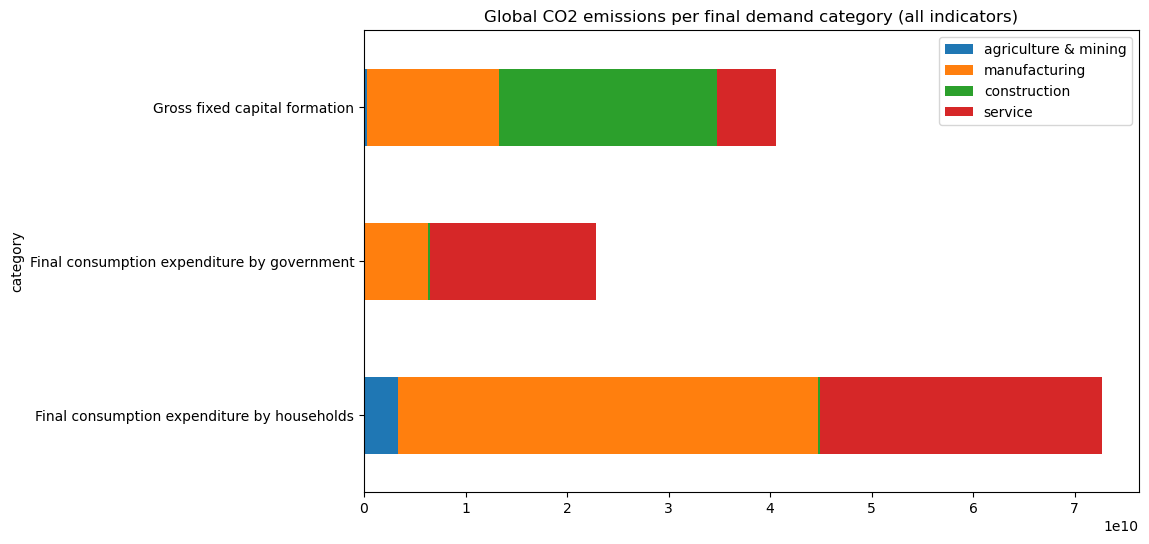

In [22]:
# Plot results
Footprint.T.plot(  # transpose to show per final demand sector
    figsize = (10,6),
    kind = 'barh',
    stacked=True,
    title = f"Global CO2 emissions per final demand category (all indicators)",
)

## References
Hertwich, E. G., & Peters, G. P. (2009). Carbon footprint of nations: A global, trade-linked analysis. Environmental Science and Technology, 43(16), 6414–6420. https://doi.org/10.1021/es803496a

Wood, R., Stadler, K., Simas, M., Bulavskaya, T., Giljum, S., Lutter, S., & Tukker, A. (2018). Growth in Environmental Footprints and Environmental Impacts Embodied in Trade: Resource Efficiency Indicators from EXIOBASE3. Journal of Industrial Ecology, 22(3), 553–562. https://doi.org/10.1111/jiec.12735